In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [2]:
DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

In [3]:
h1_dbd.columns

Index(['DOW', 'Occ', 'RoomsSold', 'ADR', 'RoomRev', 'RevPAR', 'NumCancels',
       'Trn_RoomsSold', 'Trn_ADR', 'Trn_RoomRev', 'Grp_RoomsSold', 'Grp_ADR',
       'Grp_RoomRev', 'TrnP_RoomsSold', 'TrnP_ADR', 'TrnP_RoomRev',
       'Cnt_RoomsSold', 'Cnt_ADR', 'Cnt_RoomRev', 'WE', 'WD', 'STLY_Date'],
      dtype='object')

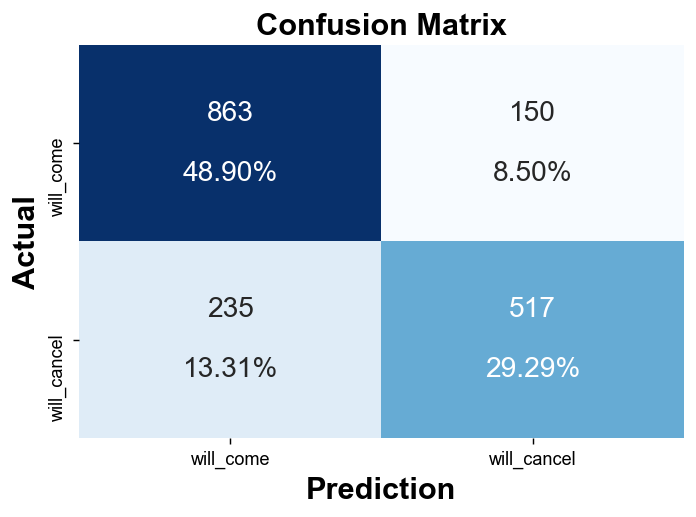

Optimal probability threshold (to maximize F-0.5): 0.67
F-0.5 Score: 0.756

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-02, stay_date 2016-08-02...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-03...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-04...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-05...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-06...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-07...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-02, stay_dat

In [4]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [5]:
h1_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,Trn_CxlForecast,TrnP_RoomsOTB,TrnP_RevOTB,TrnP_CxlForecast,Grp_RoomsOTB,Grp_RevOTB,Grp_CxlForecast,Cnt_RoomsOTB,Cnt_RevOTB,Cnt_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,LYA_Occ,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,LYA_Trn_RoomsSold,LYA_Trn_ADR,LYA_Trn_RoomRev,LYA_Grp_RoomsSold,LYA_Grp_ADR,LYA_Grp_RoomRev,LYA_TrnP_RoomsSold,LYA_TrnP_ADR,LYA_TrnP_RoomRev,LYA_Cnt_RoomsSold,LYA_Cnt_ADR,LYA_Cnt_RoomRev,Realized_Cxls,SellingPrice,TM05_RoomsOTB,TM05_ADR,TM05_TRN_OTB,TM05_TRN_ADR,TM05_TRNP_OTB,TM05_TRNP_ADR,TM05_GRP_OTB,TM05_GRP_ADR,TM05_CNT_OTB,TM05_CNT_ADR,TM15_RoomsOTB,TM15_ADR,TM15_TRN_OTB,TM15_TRN_ADR,TM15_TRNP_OTB,TM15_TRNP_ADR,TM15_GRP_OTB,TM15_GRP_ADR,TM15_CNT_OTB,TM15_CNT_ADR,TM30_RoomsOTB,TM30_ADR,TM30_TRN_OTB,TM30_TRN_ADR,TM30_TRNP_OTB,TM30_TRNP_ADR,TM30_GRP_OTB,TM30_GRP_ADR,TM30_CNT_OTB,TM30_CNT_ADR,STLY_RoomsOTB,STLY_ADR_OTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR,STLY_TM15_RoomsOTB,STLY_TM05_ADR,STLY_TM30_RoomsOTB,STLY_TM30_ADR,STLY_Trn_RoomsOTB,STLY_Trn_ADR_OTB,STLY_TM05_TRN_OTB,STLY_TM05_TRN_ADR,STLY_TM15_TRN_OTB,STLY_TM15_TRN_ADR,STLY_TM30_TRN_OTB,STLY_TM30_TRN_ADR,STLY_TrnP_RoomsOTB,STLY_TrnP_ADR_OTB,STLY_TM05_TRNP_OTB,STLY_TM05_TRNP_ADR,STLY_TM15_TRNP_OTB,STLY_TM15_TRNP_ADR,STLY_TM30_TRNP_OTB,STLY_TM30_TRNP_ADR,STLY_Grp_RoomsOTB,STLY_Grp_ADR_OTB,STLY_TM05_GRP_OTB,STLY_TM05_GRP_ADR,STLY_TM15_GRP_OTB,STLY_TM15_GRP_ADR,STLY_TM30_GRP_OTB,STLY_TM30_GRP_ADR,STLY_Cnt_RoomsOTB,STLY_Cnt_ADR_OTB,STLY_TM05_CNT_OTB,STLY_TM05_CNT_ADR,STLY_TM15_CNT_OTB,STLY_TM15_CNT_ADR,STLY_TM30_CNT_OTB,STLY_TM30_CNT_ADR
2017-08-01,Tue,184.0,35239.14,18.0,151.0,29935.72,16.0,13.0,2488.24,2.0,2.0,291.66,0.0,18.0,2523.52,0.0,2017-08-01,2017-07-27,2017-07-17,2017-07-02,2017-08-06,False,False,2016-08-02,0.98,188.44,21,191.52,198.25,191.40,145.83,140.20,0.98,183.0,170.00,31110.89,166.37,81.0,159.0,175.03,27829.05,0.0,0.0,0.0,14.0,152.47,2134.60,10.0,114.72,1147.24,134,204.00,177.0,192.05,144.0,199.23,13.0,191.40,2.0,145.83,18.0,140.20,180.0,191.78,147.0,198.75,13.0,191.40,2.0,145.83,18.0,140.20,170.0,188.18,139.0,195.88,11.0,177.17,2.0,145.83,18.0,140.20,183.0,170.00,185.03,182.0,167.36,180.0,168.12,180.0,166.00,159.0,175.03,158.0,172.89,156.0,172.07,156.0,170.50,14.0,152.47,14.0,152.47,14.0,152.47,14.0,152.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,114.72,10.0,114.72,10.0,114.72,10.0,114.72
2017-08-02,Wed,186.0,36141.47,19.0,152.0,30940.93,17.0,11.0,2004.24,2.0,2.0,291.66,0.0,21.0,2904.64,0.0,2017-08-02,2017-07-28,2017-07-18,2017-07-03,2017-08-06,False,False,2016-08-03,0.99,193.27,20,194.31,203.56,182.20,145.83,138.32,0.97,182.0,173.96,31660.62,169.31,86.0,159.0,178.23,28337.88,1.0,241.0,241.0,14.0,154.47,2162.60,8.0,114.89,919.14,131,206.75,183.0,193.75,149.0,203.06,11.0,182.20,2.0,145.83,21.0,138.32,183.0,192.39,149.0,201.39,11.0,182.20,2.0,145.83,21.0,138.32,174.0,187.86,143.0,196.84,9.0,162.76,2.0,145.83,20.0,139.16,182.0,173.96,185.03,173.0,172.51,176.0,172.87,179.0,170.49,159.0,178.23,151.0,177.65,154.0,177.14,157.0,174.75,14.0,154.47,14.0,154.47,14.0,154.47,14.0,154.47,1.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,114.89,8.0,114.89,8.0,114.89,8.0,114.89
2017-08-03,Thu,179.0,35705.54,17.0,140.0,29773.21,15.0,13.0,2225.28,2.0,3.0,453.06,0.0,23.0,3253.99,0.0,2017-08-03,2017-07-29,2017-07-19,2017-07-04,2017-08-06,False,False,2016-08-04,0.96,190.94,25,199.47,212.67,171.18,151.02,141.48,0.98,183.0,182.11,33326.17,178.21,96.0,153.0,185.74,28417.71,0.0,0.0,0.0,20.0,186.56,3731.12,10.0,117.73,1177.34,140,210.33,184.0,200.31,145.0,213.27,13.0,171.18,3.0,151.02,23.0,141.48,181.0,198.69,144.0,211.53,11.0,163.20,3.0,151.02,23.0,141.48,170.0,194.54,135.0,206.31,11.0,163.20,2.0,145.83,22.0,142.39,183.0,182.11,185.03,177.0,179.67,177.0,180.40,173.0,177.01,153.0,185.74,149.0,184.72,149.0,183.85,145.0,180.79,20.0,186.56,18.0,179.47,18.0,179.47,18.0,179.47,0.0,0.0,0.0,0.0,0

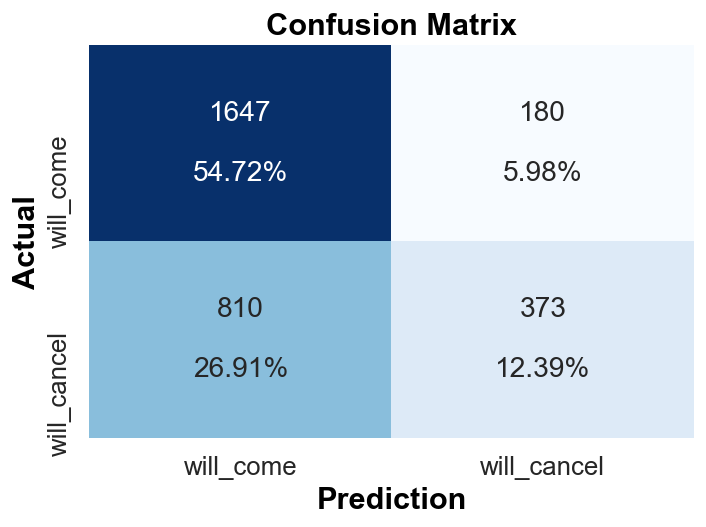

Optimal probability threshold (to maximize F-0.5): 0.35
F-0.5 Score: 0.549

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...

Pulling stats from STLY date 2016-08-02, stay_date 2016-08-02...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-03...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-04...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-05...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-06...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-07...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-08...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-09...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-10...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-11...
Pulling stats from STLY date 2016-08-02, stay_date 2016-08-12...
Pulling stats from STLY date 2016-08-02, stay_dat

In [6]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [7]:
h1_sim.to_pickle("pickle/h1_sim.pick")
h2_sim.to_pickle("pickle/h2_sim.pick")

In [8]:
from model_cancellations import get_otb_res
import datetime
test = get_otb_res(h1_res,'2016-08-01')
mask = (test.ArrivalDate<='2016-08-05') & (test.CheckoutDate>'2016-08-05')
len(test[mask])

176

In [9]:
h2_sim[['TM05_RoomsOTB', 'TM15_RoomsOTB', 'TM30_RoomsOTB']].head(15)

,TM05_RoomsOTB,TM15_RoomsOTB,TM30_RoomsOTB
2017-08-01,212.0,204.0,194.0
2017-08-02,225.0,218.0,217.0
2017-08-03,203.0,198.0,195.0
2017-08-04,215.0,221.0,222.0
2017-08-05,205.0,213.0,221.0
2017-08-06,210.0,216.0,221.0
2017-08-07,212.0,213.0,214.0
2017-08-08,219.0,216.0,213.0
2017-08-09,215.0,210.0,206.0
2017-08-10,218.0,223.0,215.0


In [10]:
h1_dbd.loc["2017-08-02"]

DOW                               Wed
Occ                              0.99
RoomsSold                       185.0
ADR                            194.32
RoomRev                      35948.37
RevPAR                         192.24
NumCancels                      132.0
Trn_RoomsSold                   151.0
Trn_ADR                        203.63
Trn_RoomRev                  30747.83
Grp_RoomsSold                     2.0
Grp_ADR                        145.83
Grp_RoomRev                    291.66
TrnP_RoomsSold                   11.0
TrnP_ADR                        182.2
TrnP_RoomRev                  2004.24
Cnt_RoomsSold                    21.0
Cnt_ADR                        138.32
Cnt_RoomRev                   2904.64
WE                              False
WD                               True
STLY_Date         2016-08-03 00:00:00
Name: 2017-08-02 00:00:00, dtype: object

In [11]:
h1_dbd.loc['2016-08-03']

DOW                               Wed
Occ                              0.97
RoomsSold                       182.0
ADR                            173.96
RoomRev                      31660.62
RevPAR                         169.31
NumCancels                       86.0
Trn_RoomsSold                   159.0
Trn_ADR                        178.23
Trn_RoomRev                  28337.88
Grp_RoomsSold                     1.0
Grp_ADR                         241.0
Grp_RoomRev                     241.0
TrnP_RoomsSold                   14.0
TrnP_ADR                       154.47
TrnP_RoomRev                   2162.6
Cnt_RoomsSold                     8.0
Cnt_ADR                        114.89
Cnt_RoomRev                    919.14
WE                              False
WD                               True
STLY_Date         2015-08-05 00:00:00
Name: 2016-08-03 00:00:00, dtype: object

In [12]:
h1_res.columns

Index(['ResNum', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'LOS', 'CheckoutDate', 'PreviousBookings', 'ResMadeDate',
       'NumPeople', 'CT_is_grp', 'CT_is_trn', 'CT_is_trnP', 'RS_No-Show',
       'MS_Corporate', 'MS_Direct', 'MS_Groups', 'MS_Offline TA/TO',
       'MS_Online TA', 'DC_Direct', 'DC_TA/TO', 'DC_Undefined', 'MEAL_FB',
       'MEAL_HB', 'MEAL_SC', 'MEAL_Undefined', 'FROM_PRT', 'FROM_G

In [13]:
h1_res.ReservationStatus.value_counts()

Check-Out    28938
Canceled     10831
No-Show        291
Name: ReservationStatus, dtype: int64

In [14]:
h2_sim.head()

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,Trn_CxlForecast,TrnP_RoomsOTB,TrnP_RevOTB,TrnP_CxlForecast,Cnt_RoomsOTB,Cnt_RevOTB,Cnt_CxlForecast,Grp_RoomsOTB,Grp_RevOTB,Grp_CxlForecast,Date,TM05_Date,TM15_Date,TM30_Date,WeekEndDate,WE,WD,STLY_Date,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,LYA_Occ,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,LYA_Trn_RoomsSold,LYA_Trn_ADR,LYA_Trn_RoomRev,LYA_Grp_RoomsSold,LYA_Grp_ADR,LYA_Grp_RoomRev,LYA_TrnP_RoomsSold,LYA_TrnP_ADR,LYA_TrnP_RoomRev,LYA_Cnt_RoomsSold,LYA_Cnt_ADR,LYA_Cnt_RoomRev,Realized_Cxls,SellingPrice,TM05_RoomsOTB,TM05_ADR,TM05_TRN_OTB,TM05_TRN_ADR,TM05_TRNP_OTB,TM05_TRNP_ADR,TM05_GRP_OTB,TM05_GRP_ADR,TM05_CNT_OTB,TM05_CNT_ADR,TM15_RoomsOTB,TM15_ADR,TM15_TRN_OTB,TM15_TRN_ADR,TM15_TRNP_OTB,TM15_TRNP_ADR,TM15_GRP_OTB,TM15_GRP_ADR,TM15_CNT_OTB,TM15_CNT_ADR,TM30_RoomsOTB,TM30_ADR,TM30_TRN_OTB,TM30_TRN_ADR,TM30_TRNP_OTB,TM30_TRNP_ADR,TM30_GRP_OTB,TM30_GRP_ADR,TM30_CNT_OTB,TM30_CNT_ADR,STLY_RoomsOTB,STLY_ADR_OTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM15_ADR,STLY_TM15_RoomsOTB,STLY_TM05_ADR,STLY_TM30_RoomsOTB,STLY_TM30_ADR,STLY_Trn_RoomsOTB,STLY_Trn_ADR_OTB,STLY_TM05_TRN_OTB,STLY_TM05_TRN_ADR,STLY_TM15_TRN_OTB,STLY_TM15_TRN_ADR,STLY_TM30_TRN_OTB,STLY_TM30_TRN_ADR,STLY_TrnP_RoomsOTB,STLY_TrnP_ADR_OTB,STLY_TM05_TRNP_OTB,STLY_TM05_TRNP_ADR,STLY_TM15_TRNP_OTB,STLY_TM15_TRNP_ADR,STLY_TM30_TRNP_OTB,STLY_TM30_TRNP_ADR,STLY_Grp_RoomsOTB,STLY_Grp_ADR_OTB,STLY_TM05_GRP_OTB,STLY_TM05_GRP_ADR,STLY_TM15_GRP_OTB,STLY_TM15_GRP_ADR,STLY_TM30_GRP_OTB,STLY_TM30_GRP_ADR,STLY_Cnt_RoomsOTB,STLY_Cnt_ADR_OTB,STLY_TM05_CNT_OTB,STLY_TM05_CNT_ADR,STLY_TM15_CNT_OTB,STLY_TM15_CNT_ADR,STLY_TM30_CNT_OTB,STLY_TM30_CNT_ADR
2017-08-01,Tue,211.0,27892.60,38.0,194.0,25791.40,38.0,15.0,1881.20,0.0,2.0,220.0,0.0,0.0,0.0,0.0,2017-08-01,2017-07-27,2017-07-17,2017-07-02,2017-08-06,False,False,2016-08-02,0.93,123.42,53,132.19,132.95,125.41,0.0,110.0,0.96,218.0,117.57,25630.49,113.41,105.0,181.0,121.12,21923.27,0.0,0.0,0.0,37.0,100.20,3707.22,0.0,0.00,0.0,168,137.65,212.0,133.65,195.0,134.53,15.0,125.41,0.0,0.0,2.0,110.0,204.0,135.89,187.0,137.01,15.0,125.41,0.0,0.0,2.0,110.0,194.0,133.22,175.0,134.28,17.0,125.07,0.0,0.0,2.0,110.0,219.0,117.33,121.54,199.0,117.62,193.0,117.31,196.0,116.93,182.0,120.81,162.0,121.38,156.0,121.93,159.0,121.00,37.0,100.20,37.0,99.46,37.0,99.46,37.0,99.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
2017-08-02,Wed,224.0,30899.51,30.0,181.0,24717.85,30.0,41.0,5961.66,0.0,2.0,220.0,0.0,0.0,0.0,0.0,2017-08-02,2017-07-28,2017-07-18,2017-07-03,2017-08-06,False,False,2016-08-03,0.99,136.72,32,137.94,136.56,145.41,0.0,110.0,0.97,219.0,115.62,25319.84,112.03,114.0,180.0,119.70,21546.87,0.0,0.0,0.0,39.0,96.74,3772.97,0.0,0.00,0.0,146,139.66,225.0,138.09,182.0,136.75,41.0,145.41,0.0,0.0,2.0,110.0,218.0,138.60,174.0,137.41,42.0,144.92,0.0,0.0,2.0,110.0,217.0,136.65,171.0,135.10,44.0,143.90,0.0,0.0,2.0,110.0,220.0,115.78,121.54,219.0,115.92,216.0,116.21,214.0,113.90,181.0,119.88,178.0,120.78,175.0,120.50,173.0,118.05,39.0,96.74,41.0,96.37,41.0,96.37,41.0,96.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
2017-08-03,Thu,221.0,29717.16,27.0,193.0,25670.50,27.0,26.0,3826.66,0.0,2.0,220.0,0.0,0.0,0.0,0.0,2017-08-03,2017-07-29,2017-07-19,2017-07-04,2017-08-06,False,False,2016-08-04,0.98,131.49,32,134.47,133.01,147.18,0.0,110.0,0.99,224.0,118.04,26440.66,116.99,150.0,193.0,120.89,23331.44,0.0,0.0,0.0,31.0,100.30,3109.22,0.0,0.00,0.0,160,137.19,203.0,132.68,183.0,132.60,18.0,136.01,0.0,0.0,2.0,110.0,198.0,134.00,178.0,134.07,18.0,136.01,0.0,0.0,2.0,110.0,195.0,131.13,176.0,132.20,17.0,122.54,0.0,0.0,2.0,110.0,224.0,118.04,121.54,214.0,117.57,211.0,118.66,207.0,115.88,193.0,120.89,182.0,122.04,179.0,120.81,175.0,118.89,31.0,100.30,32.0,99.42,32.0,99.42,32.0,99.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00
2017-08-04,Fri,225.0,30473.06,31.0,199.0,26979.40,31.0,26.0,3493.66,0.0,0.0,

In [15]:
h1_dbd.loc["2017-08-15", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

RoomsSold        179.0
ADR             188.82
RoomRev       33798.75
RevPAR          180.74
NumCancels       111.0
Name: 2017-08-15 00:00:00, dtype: object

In [16]:
h1_dbd.loc["2016-08-16", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

RoomsSold        181.0
ADR             187.18
RoomRev       33880.04
RevPAR          181.18
NumCancels       113.0
Name: 2016-08-16 00:00:00, dtype: object